In [1]:
###  HR is in train not test
###  

In [2]:
#!pip3 install xgboost

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
frequency = pd.read_csv('frequency_domain_features_train.csv')
heart_rate = pd.read_csv('heart_rate_non_linear_features_train.csv')
time_domain = pd.read_csv('time_domain_features_train.csv')
frequency_test = pd.read_csv('frequency_domain_features_test.csv')
heart_rate_test = pd.read_csv('heart_rate_non_linear_features_test.csv')
time_domain_test = pd.read_csv('time_domain_features_test.csv')

In [5]:
frequency.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [6]:
heart_rate.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [7]:
time_domain.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [8]:
#df_sum = df_data_cleaned.merge(df_user, how = 'inner', on = 'user id')
#df_sum = df_sum.merge(df_item_cleaned, how = 'inner', on = 'movie id')

In [9]:
heart_rate.shape

(369289, 7)

In [10]:
frequency.shape

(369289, 12)

In [11]:
time_domain.shape

(369289, 20)

In [12]:
df_train = heart_rate.merge(frequency, how = 'inner', on = 'uuid')
df_train = df_train.merge(time_domain, how = 'inner', on = 'uuid')

In [13]:
df_train.shape

(369289, 37)

In [14]:
df_test = heart_rate_test.merge(frequency_test, how = 'inner', on = 'uuid')
df_test = df_test.merge(time_domain_test, how = 'inner', on = 'uuid')

In [15]:
df_test.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
2,cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082


In [16]:
time_domain_test.head(1)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,62b75db5-bc40-4c8f-9166-daf0efcab4c2


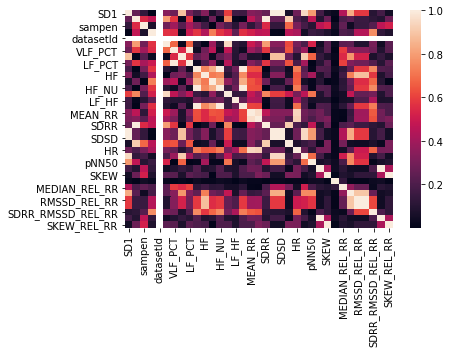

In [17]:
sns.heatmap(df_train.corr().abs())

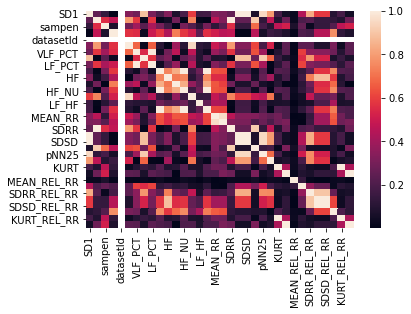

In [18]:
sns.heatmap(df_test.corr().abs())

In [20]:
for i in df_train.columns:
    print(i, 'Min:', df_train[i].min())
    print(i, 'Max:', df_train[i].max())
    print(i, 'Values:', df_train[i].nunique())
    print(df_train[i].unique())
    print()

uuid Min: 00000adc-655e-417e-80e1-e9ff737a67fe
uuid Max: fffff367-ce11-471d-80e2-3f391032225f
uuid Values: 369289
['89df2855-56eb-4706-a23b-b39363dd605a'
 '80c795e4-aa56-4cc0-939c-19634b89cbb2'
 'c2d5d102-967c-487d-88f2-8b005a449f3e' ...
 'fd717478-95c3-48fc-bcdc-3adebae824ab'
 'a0fc861e-3254-4210-bd5d-37870245f7da'
 '1f2eb52d-4f09-4921-a383-ef1bc6221789']

SD1 Min: 3.9113439722270416
SD1 Max: 18.83610739902807
SD1 Values: 369289
[11.00156459  9.17012922 11.53341728 ... 16.30453006 11.83855289
 14.60630653]

SD2 Min: 38.30774470670728
SD2 Max: 796.8529451335228
SD2 Values: 369289
[199.06178217 114.63445847 118.93925348 ... 133.79779277 110.31147414
  94.61780078]

sampen Min: 0.4345758719747202
sampen Max: 2.234841240774124
sampen Values: 82511
[2.139754   2.17449878 2.13534971 ... 1.61286829 1.99652065 1.15742085]

higuci Min: 1.03398439739895
higuci Max: 1.361219058229656
higuci Values: 369289
[1.1634852  1.08471059 1.17631483 ... 1.14023216 1.18193718 1.23408686]

datasetId Min: 2
d

KURT Values: 369289
[-0.8565538  -0.40818997  0.35178907 ... -0.42968581  0.60038937
 -0.39795035]

SKEW Min: -2.136278234011955
SKEW Max: 6.777800226330397
SKEW Values: 369289
[ 0.33521799 -0.15528643 -0.65681315 ... -0.07532115 -0.63476207
 -0.19151383]

MEAN_REL_RR Min: -0.001233913769892292
MEAN_REL_RR Max: 0.001244097560357459
MEAN_REL_RR Values: 369289
[-2.02985921e-04 -5.88301753e-05 -1.09115179e-05 ... -2.15997797e-04
  2.38202433e-05 -1.50187097e-05]

MEDIAN_REL_RR Min: -0.004425422487639847
MEDIAN_REL_RR Max: 0.002095434260298753
MEDIAN_REL_RR Values: 25041
[-0.00017922  0.00061076 -0.0002628  ... -0.00073857 -0.00087947
 -0.00117042]

SDRR_REL_RR Min: 0.008986633936236629
SDRR_REL_RR Max: 0.03657140608287461
SDRR_REL_RR Values: 369289
[0.01707995 0.01397752 0.01853891 ... 0.02270471 0.02154876 0.02537389]

RMSSD_REL_RR Min: 0.003219801916055364
RMSSD_REL_RR Max: 0.02695542130187455
RMSSD_REL_RR Values: 369289
[0.00796884 0.00476909 0.00871577 ... 0.00949352 0.01137556 0.0135

In [21]:
df_sample = df_train.sample(1000)
df_sample = df_sample.drop(columns = ['datasetId', 'uuid'])
df_sample = pd.get_dummies(df_sample, drop_first = True, columns = ['condition'])

In [22]:
df_sample.head(11)

,SD1,SD2,sampen,higuci,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_no stress,condition_time pressure
300309,11.243204,161.073135,2.113070,1.179658,1941.846438,63.181084,1125.934232,36.634074,99.497969,5.681056,0.184842,0.502031,3073.461726,198.191005,0.005046,957.540908,964.575370,114.173037,15.895606,15.894987,7.182679,63.657312,11.333333,0.400000,0.292324,-0.517840,-0.000182,-0.000660,0.016359,0.007357,0.007357,2.223529,0.292324,-0.517840,1,0
126756,7.941483,70.423429,2.199001,1.138952,556.829928,41.800253,760.310913,57.075216,98.067808,14.980111,1.124531,1.932192,1332.120952,50.754692,0.019703,779.386998,779.193530,50.112506,11.227773,11.227206,4.463263,77.303981,1.933333,0.000000,-0.273421,0.060768,-0.000137,-0.001188,0.014396,0.006357,0.006357,2.264548,-0.273421,0.060768,1,0
246267,7.922558,94.890726,2.172084,1.232385,518.217295,48.387846,509.060438,47.532837,92.096209,43.688087,4.079317,7.903791,1070.965821,11.652157,0.085821,734.152086,739.897200,67.331333,11.200540,11.200451,6.011436,82.459680,2.666667,0.000000,-0.106021,-0.423838,-0.000065,-0.001121,0.015504,0.009730,0.009730,1.593466,-0.106021,-0.423838,1,0
60975,10.305129,87.091038,2.157737,1.303700,1138.006952,63.235393,595.570920,33.093964,90.015823,66.058222,3.670643,9.984177,1799.636094,9.015848,0.110916,813.014611,822.369475,62.012275,14.568829,14.568791,4.256504,74.248404,9.133333,0.066667,-0.263228,-0.382034,-0.000065,-0.000026,0.018374,0.011515,0.011515,1.595561,-0.263228,-0.382034,0,0
248273,9.472233,99.904225,2.177791,1.129559,1859.065375,68.782566,820.572641,30.359929,97.253121,23.176778,0.857505,2.746879,2702.814795,35.404948,0.028245,805.775240,804.904255,70.959768,13.391325,13.391292,5.298936,75.062533,6.333333,0.333333,-0.166102,-0.181299,-0.000039,0.000556,0.017110,0.007615,0.007615,2.246911,-0.166102,-0.181299,1,0
225663,13.017501,227.169162,2.040477,1.133546,3105.576169,73.485681,1118.322210,26.462294,99.803784,2.198645,0.052025,0.196216,4226.097024,508.641578,0.001966,1101.535439,1138.231350,160.896370,18.404882,18.403384,8.742049,55.839251,16.800000,0.933333,-0.398571,-0.722890,-0.000209,-0.000048,0.016828,0.006724,0.006724,2.502586,-0.398571,-0.722890,0,1
315238,12.073314,477.464326,1.902450,1.087715,6449.584186,93.256273,459.323386,6.641480,98.483834,7.071316,0.102246,1.516166,6915.978888,64.955855,0.015395,1157.314730,1241.549350,337.726182,17.068618,17.068548,19.786381,58.110981,11.666667,1.800000,-1.051515,-0.446044,-0.000067,0.000084,0.017817,0.007504,0.007504,2.374409,-1.051515,-0.446044,1,0
195465,9.818112,78.017262,2.138817,1.298961,746.051562,52.409496,612.416877,43.021772,90.399907,65.036116,4.568733,9.600093,1423.504554,9.416566,0.106196,781.758639,786.007540,55.601657,13.880365,13.880275,4.005778,77.161449,5.600000,0.400000,0.462000,-0.569901,0.000053,-0.000940,0.018004,0.011264,0.011264,1.598352,0.462000,-0.569901,1,0
124657,11.569158,183.334233,2.022752,1.118750,2772.764946,71.246494,1110.151522,28.525463,99.206905,8.874941,0.228043,0.793095,3891.791409,125.088331,0.007994,933.394607,893.898605,129.894739,16.356794,16.355802,7.941333,65.454243,11.533333,1.066667,-0.420900,0.719197,0.000164,0.000140,0.016979,0.006849,0.006849,2.479179,-0.420900,0.719197,1,0
86154,6.544880,74.561604,2.189685,1.137071,1055.827380,72.183902,387.705021,26.506285,95.291171,19.158510,1.309813,4.708829,1462.690911,20.236700,0.049415,736.954916,739.984155,52.925742,9.252770,9.252770,5.719989,81.842593,0.866667,0.000000,-0.638209,-0.055600,-0.000019,0.000765,0.012567,0.006262,0.006262,2.006832,-0.638209,-0.055600,0,0


In [23]:
X = df_sample.drop(columns = 'HR')
y = df_sample['HR']

In [24]:
y.head()

300309    63.657312
126756    77.303981
246267    82.459680
60975     74.248404
248273    75.062533
Name: HR, dtype: float64

In [25]:
X.head()

,SD1,SD2,sampen,higuci,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_no stress,condition_time pressure
300309,11.243204,161.073135,2.113070,1.179658,1941.846438,63.181084,1125.934232,36.634074,99.497969,5.681056,0.184842,0.502031,3073.461726,198.191005,0.005046,957.540908,964.575370,114.173037,15.895606,15.894987,7.182679,11.333333,0.400000,0.292324,-0.517840,-0.000182,-0.000660,0.016359,0.007357,0.007357,2.223529,0.292324,-0.517840,1,0
126756,7.941483,70.423429,2.199001,1.138952,556.829928,41.800253,760.310913,57.075216,98.067808,14.980111,1.124531,1.932192,1332.120952,50.754692,0.019703,779.386998,779.193530,50.112506,11.227773,11.227206,4.463263,1.933333,0.000000,-0.273421,0.060768,-0.000137,-0.001188,0.014396,0.006357,0.006357,2.264548,-0.273421,0.060768,1,0
246267,7.922558,94.890726,2.172084,1.232385,518.217295,48.387846,509.060438,47.532837,92.096209,43.688087,4.079317,7.903791,1070.965821,11.652157,0.085821,734.152086,739.897200,67.331333,11.200540,11.200451,6.011436,2.666667,0.000000,-0.106021,-0.423838,-0.000065,-0.001121,0.015504,0.009730,0.009730,1.593466,-0.106021,-0.423838,1,0
60975,10.305129,87.091038,2.157737,1.303700,1138.006952,63.235393,595.570920,33.093964,90.015823,66.058222,3.670643,9.984177,1799.636094,9.015848,0.110916,813.014611,822.369475,62.012275,14.568829,14.568791,4.256504,9.133333,0.066667,-0.263228,-0.382034,-0.000065,-0.000026,0.018374,0.011515,0.011515,1.595561,-0.263228,-0.382034,0,0
248273,9.472233,99.904225,2.177791,1.129559,1859.065375,68.782566,820.572641,30.359929,97.253121,23.176778,0.857505,2.746879,2702.814795,35.404948,0.028245,805.775240,804.904255,70.959768,13.391325,13.391292,5.298936,6.333333,0.333333,-0.166102,-0.181299,-0.000039,0.000556,0.017110,0.007615,0.007615,2.246911,-0.166102,-0.181299,1,0


In [26]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42) 

In [27]:
X_test.shape

(300, 35)

In [28]:
y_test.shape

(300,)

In [29]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print('Random Forest Regressor:')
print('')
print('Training Score:', rf.score(X_train, y_train))
print('Validate Score:', rf.score(X_test, y_test))
print('Mean Abs Error:', mean_absolute_error(y_test, rf_pred))
print('Random Forest Coefficients:')
print(rf.feature_importances_)

rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
rf_mae = mean_absolute_error(y_test, rf_pred) 



Random Forest Regressor:

Training Score: 0.9982764758694436
Validate Score: 0.9912292853106626
Mean Abs Error: 0.4234077743835748
Random Forest Coefficients:
[9.30274530e-05 1.11018784e-03 7.80259745e-04 3.49127387e-04
 6.25751748e-04 4.09263384e-04 3.36492747e-04 6.79482360e-04
 6.08957380e-04 2.79281198e-03 4.16736231e-03 4.02684748e-04
 4.89346404e-04 3.30812616e-04 3.94578122e-04 3.86781197e-01
 5.90956453e-01 1.01646134e-03 1.22117320e-04 1.14877097e-04
 1.04656526e-03 2.05104566e-04 2.68907302e-04 2.49341656e-04
 2.24549236e-04 4.93470205e-04 3.41513623e-04 6.70568876e-04
 1.71461514e-03 1.08673981e-03 6.27913692e-04 1.72190322e-04
 2.83077413e-04 3.05677475e-05 2.36231950e-05]


In [30]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'